In [5]:
import pandas as pd
import talib as ta

stock = "TSLA"
df = pd.read_csv(f"my_data/{stock}_raw.csv", index_col=0)

df.index = pd.to_datetime(df.index)
close_prices = df['Close'].values
ma5 = ta.SMA(close_prices, timeperiod=10)

df['MA_5'] = ma5

filename = f'./my_data/{stock}_w_ma5.csv' #以股票名稱命名檔案，放在data資料夾下面
df.to_csv(filename) #將df轉成CSV保存

df

,Close,Volume,MA_5
Date,,,
2016-01-04,14.894000,102406500,NaN
2016-01-05,14.895333,47802000,NaN
2016-01-06,14.602667,56686500,NaN
2016-01-07,14.376667,53314500,NaN
2016-01-08,14.066667,54421500,NaN
...,...,...,...
2023-08-07,251.449997,111097900,259.902002
2023-08-08,249.699997,96642200,258.344002
2023-08-09,242.190002,101596300,256.128001


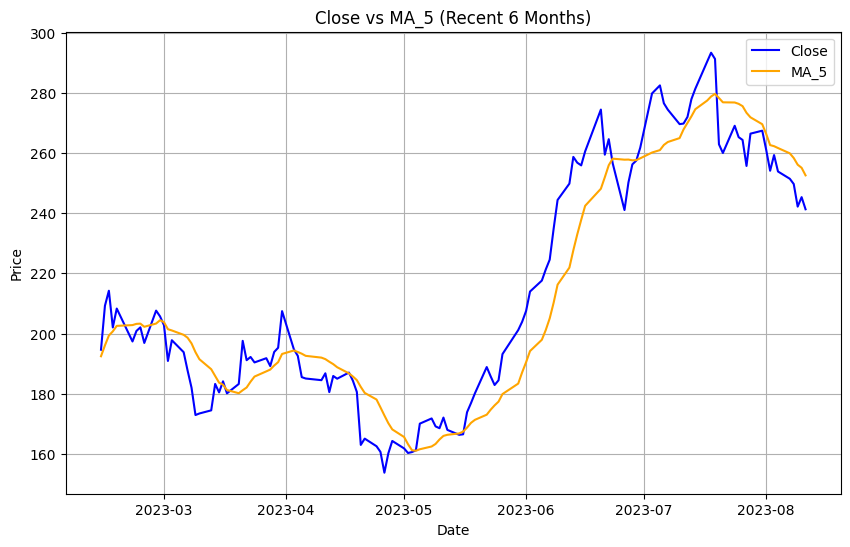

In [3]:
import matplotlib.pyplot as plt

# Filter data for the most recent 3 months
recent_df = df[df.index >= df.index.max() - pd.DateOffset(months=6)]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(recent_df.index, recent_df['Close'], color='blue', label='Close')
plt.plot(recent_df.index, recent_df['MA_5'], color='orange', label='MA_5')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close vs MA_5 (Recent 6 Months)')
plt.legend()
plt.grid(True)
plt.show()